# **Bootcamp Ciencia de Datos e Inteligencia Artificial**
# **Módulo 2. Análisis de datos**
## **Semana 7. Preprocesado de datos**


¡Hola! Te damos la bienvenida a esta semana. Ahora aprenderás sobre preprocesamiento de datos y transformación de variables categóricas.

¡Comencemos!

# Preprocesamiento de datos
Como su nombre lo indica, el preprocesamiento es una estancia previa al ingreso de los datos en un modelo. De esta manera, se asegura el cumplimiento de los criterios básicos para minimizar la cantidad de errores.

Este paso garantiza que la información sea adecuada, es decir, que el algorítmo sea sensible a la escala de los datos. Así, por ejemplo, se otorga mayor o menor importancia a una variable según los valores tomados.

Por otro lado, ciertos algorítmos necesitan entrenarse. Esto obliga a codificar las variables categóricas en valores númericos mediante distintas técnicas.

Entre ellas, destacan las siguientes:


## Escalado de datos


Al hablar del escalamiento de los datos se alude al cambio de la escala de una variable o de todo el set para que las variables tengan una misma escala y no afecten al rendimiento del modelo seleccionado. Por ejemplo, un algoritmo no supervisado llamado "vecinos más cercanos" mide la distancia de un registro a otro; si los datos no se estandarizaran,  las distancias entre cada registro cambiarían drásticamente, haciendo que el algóritmo se entienda de forma distinta.

Una manera sencilla de entender el escalado es imaginar un conjunto de datos con distintas variables y que tratará de predecir si un alumno aprueba o reprueba una asignatura específica. Una de las variables es el tiempo de horas de estudios, con valores como 3 horas, 7 horas, 0 horas, entre otros. Por su parte, hay una variable que indica el número de aciertos que obtuvo en una asignatura similar cuyos valores registrados son 116, 89, 96, etcétera.

Como puedes ver, la primera variable (horas de estudio) incluye números pequeños, mientras que la segunda variable (aciertos) abarca cifras más grandes. Si estos datos se ingresan en un modelo, los valores de los aciertos tendrán más peso que las horas de estudio. Es en este caso, el escalado se vale de cálculos matemáticos para convertir los valores en datos más similares (los cuales, por lo general, rondan entre -1 y 1) para ambas variables. Esto hace que una variable no sea más «pesada» que otra y sesgue el resultado del modelo.

Como se ha comentado esto requiere de varios cálculos matemáticos, pero la librería "Scikit-learn" ofrece un módulo con distintos escaladores. A continuación, revisarás los más relevantes.


El primer paso (como en cualquier programación de Ciencias de Datos) consiste en importar las librerías necesarias para hacer el análisis. Ya conoces algunas de ellas: pandas, numpy y matplotlib, etc.

Recuerda que puedes escribir código en Google Colab agregando un cuadro de código.

En esta ocasión, utilizarás el siguiente código: `sklearn.preprocessing`, junto con la función `StandardScaler`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

A continuación, se añade el siguiente código. Observa un ejemplo de este escalador, el cual estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1 (recuerda que puedes ejecutarlo).


In [2]:
x = [1, 2, 3, 3, 5, 8] #Creamos una variable x con seis elementos.
y = [2, 4, 6, 2, 3, 7] #Creamos una variable y con seis elementos.
df = pd.DataFrame({'x':x, 'y': y}, dtype = 'int') #Usamos pd.DataFrame para hacer un conjunto de datos.
# El primero se llamará "x" y tendrá como valores la variable x que ya hicimos. Hacemos lo mismo con "y".
df

,x,y
0,1,2
1,2,4
2,3,6
3,3,2
4,5,3
5,8,7


Solicita a Python que imprima las medias de la variable `x` y de la variable `y` (ambas dentro del _dataframe_ `df`).

In [3]:
print("Media de X: "+ str(np.mean(df.x)))
print("Media de Y: "+ str(np.mean(df.y)))

Media de X: 3.6666666666666665
Media de Y: 4.0


Otra forma de hacer lo anterior es mediante el siguiente código:
```python
print("Media de X: "+ str(np.mean(df['x'])))
print("Media de Y: "+ str(np.mean(df['y'])))
```

Para el caso de la varianza, se utiliza:

In [4]:
print("Desv. STD. de X: "+ str(np.std(df.x)))
print("STD de Y: "+ str(np.std(df.y)))

Desv. STD. de X: 2.2852182001336816
STD de Y: 1.9148542155126762


Otra forma de escribir lo anterior es:
```python
print("Varianza de X: "+ str(np.var(df['x'])))
print("Varianza de Y: "+ str(np.var(df['y'])))
```  

Después, ejecuta `sns.scatterplot(x, y)` para observar la distribución de las variables creadas en un gráfica de dispersión usando `scatterplot` de la librería `seaborn`.

<Axes: >

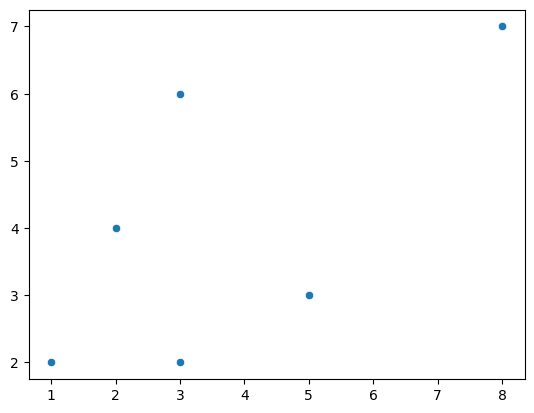

In [5]:
sns.scatterplot(x=x, y=y)

A continuación, genera una variable llamada `escalador`, que será igual a la función `StandardScaler()` y facilitará el uso de esta herramienta.

Ahota tendrás una variable llamada `transformado`, creada hace un segundo (`escalador`). Aplica una función llamada `fit_transform`, que aplicará el escalador sobre el  _data frame_.

Así, con el siguiente código Python escalará automáticamente todos los valores dentro de `df`.

In [6]:
escalador = StandardScaler() 
transformado = escalador.fit_transform(df)
transformado

array([[-1.16691993, -1.04446594],
       [-0.72932496,  0.        ],
       [-0.29172998,  1.04446594],
       [-0.29172998, -1.04446594],
       [ 0.58345997, -0.52223297],
       [ 1.89624489,  1.5666989 ]])

Recuerda que tus variables pueden llamarse como gustes, pero es preferible usar palabras que resulten más faciles de identificar y describir la función de dicha variable.

Al comprobar la varianza y la media de los nuevos datos escalados se obtiene:

In [7]:
print("Media de X escalado: "+ str(np.mean(transformado[:, 0]))) # Valores de X tienden a 0
print("Media de Y escalado: "+ str(np.mean(transformado[:, 1])))

Media de X escalado: 1.1102230246251565e-16
Media de Y escalado: 0.0


In [8]:
print("Varianza de X escalado: "+ str(np.var(transformado[:, 0])))
print("Varianza de Y escalado: "+ str(np.var(transformado[:, 1])))

Varianza de X escalado: 1.0
Varianza de Y escalado: 1.0


Observa que la distribución de los datos es idéntica.

<Axes: >

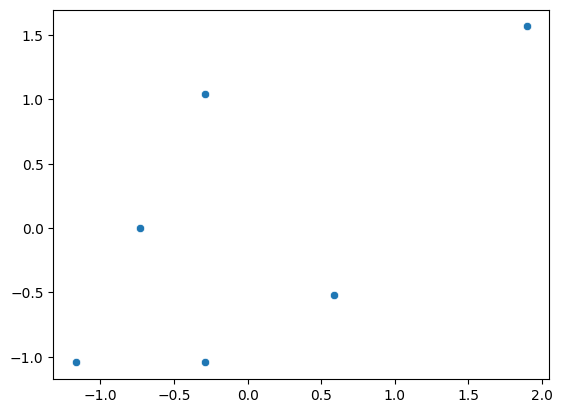

In [9]:
sns.scatterplot(x=transformado[:, 0], y=transformado[:, 1])

#### Pregúntate
- ¿Qué diferencia notas entre los primeros valores ingresados en «x» y «y» con respecto a los valores escalados?
- ¿Qué diferencia encuentras en sus varianzas?

Otra técnica es la siguiente:

### MinMaxScaler

El escalador MinMaxScaler transforma las variables escalándolas a un rango (0,1); en otras palabras, el valor más pequeño puede ser 0 y el más grande es 1. Cabe señalar que este rango es personalizable mediante un proceso denominado «normalización de datos».

Para este ejemplo, se utiliza un conjunto de datos incluido en la librería de `seaborn`. Para acceder a él, usa `.load_dataset('iris')` y asígnalo a una variable llamada `iris`.

La variable `iris` informa sobre el ancho y largo del sépalo y de los pétalos en algunas flores, para así identificar su especie.

Para trabajar este escalador, es necesario importar `MinMaxScaler` de `sklearn` usando el siguiente código:

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

En esta ocasión se tomará un _dataset_ conocido como `iris`, que no necesita descargarse, pues está integrado dentro de la librería de `seaborn`.

Para acceder a él, se aplica el siguiente código:

In [11]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


El siguiente paso es usar la función `MinMaxSclaer()` y asignarla a una variable (en este ejemplo, a `escaler`, aunque puedes usar el nombre que prefieras) para usarla más adelante.

In [12]:
escalador = MinMaxScaler()

Si observas el _dataset_ `iris`, notarás que una variable no tiene valores númericos (la columna llamada `species`). Este tipo de valores no pueden escalarse y por ello conviene quitarlos.

Para hacer eso, `iris` solo incuirá las columnas con valores numéricos, a saber: `sepal_length`, `sepal_width`, `petal_length` y `petal_width`. Lo anterior se logra con el siguente código:

In [13]:
iris=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #Quitamos variable species para quedarnos con las numéricas

Al igual que sucedió con el **escalador** anterior, se utilizará la función `.fit_transform`, que hará que Python aplique el escalado de forma automática.

Observa el resultado al emplear el siguiente código:

In [14]:
transformado= escalador.fit_transform(iris)
transformado

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Seguro notaste que la variable `transformado` es una lista de listas, por tanto, puede convertirse en un _dataframe_ usando la función de **Pandas** llamada `pd.DataFrame`.

Para que el nuevo _dataframe_ luzca más completo, sus columnas se nombrarán de la misma forma que las columnas de `iris` usando la línea de código `transformado.columns = iris.columns`.

In [15]:
transformado = pd.DataFrame(transformado)
transformado.columns = iris.columns

Puedes visualizar los datos estadísticos de los valores escalados usando `.describe`.

In [16]:
transformado.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Pregunta:
¿Qué puedes deducir al observar la tabla generada?

Aunque existen otros tipo de escaladores, los más populares para las variables continuas son los presentados en este Bootcamp. Si deseas conocer más, puedes consultarlos en la documentación oficial de Scikit-learn, haciendo clic [aquí].(https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

##### **Ponte a prueba**

Imagina que trabajas en una tienda de videojuegos y tienes un conjunto de datos que contiene la edad de los jugadores, el número de horas que juegan por semana y el total de dinero gastado en el último año en videojuegos. Quieres estandarizar y escalar estos datos para utilizarlos en un modelo de aprendizaje automático.

Puedes descargar el conjunto de datos del siguiente enlace:
https://drive.google.com/file/d/1jHTUF9PVSFN-cqXnUfYiKNJvlSY9Zwhg/view?usp=sharing

**Descripción del conjunto de datos:**

**Edad:** Edad de los jugadores (en años).

**Horas_semana:** Número de horas que un jugador juega por semana.

**Gasto_anual:** Cantidad de dinero (en USD) que un jugador ha gastado en videojuegos durante el último año.

Para lograr tu objetivo deberás realizar el siguiente análisis:
1. Carga y explora el conjunto de datos.
2. Utiliza StandardScaler para estandarizar las tres variables. Genera un nuevo dataframe.
3. Utiliza MinMaxScaler para escalar las tres variables al rango [0, 1]. Genera un nuevo dataframe.
4. Compara las distribuciones de tus datos antes y después de cada escalado utilizando gráficos.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [18]:
df_prueba = pd.read_csv('dataset_videojuegos.csv')
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Edad          100 non-null    int64
 1   Horas_semana  100 non-null    int64
 2   Gasto_anual   100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


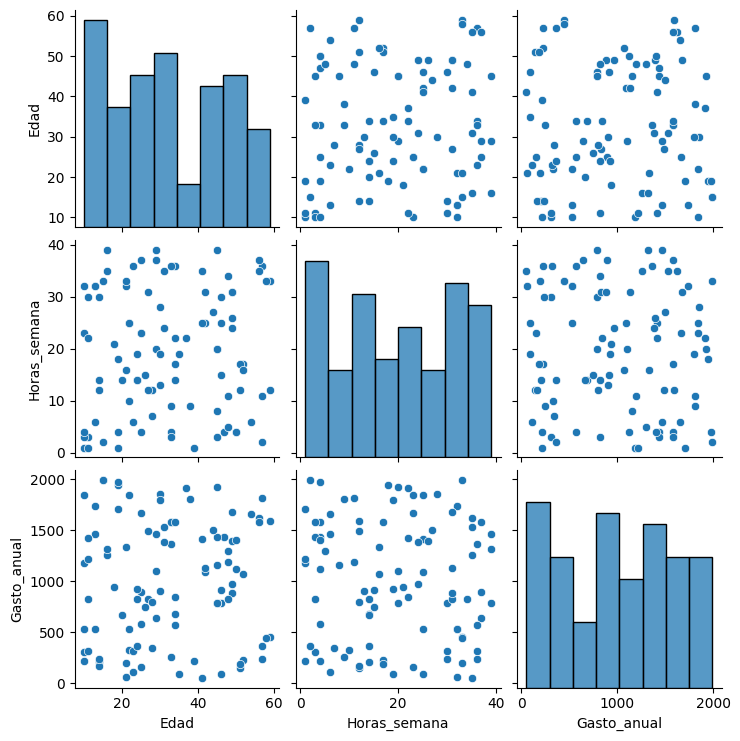

In [19]:
# Creamos un gráfico de dispersión por cada par de variables

sns.pairplot(df_prueba)


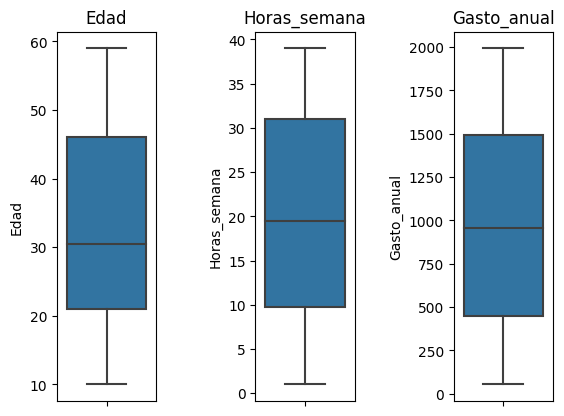

In [24]:
fig, ax = plt.subplots(1, 3)

indice = 0
for col in df_prueba.columns:
    sns.boxplot(y=df_prueba[col], ax=ax[indice])
    # Título de cada gráfico
    ax[indice].set_title(col)
    # Espaciado entre gráficos
    plt.subplots_adjust(wspace=1)
    indice += 1

In [25]:
std = StandardScaler()
minmax = MinMaxScaler()

In [26]:
df_pStd = std.fit_transform(df_prueba)
df_pStd = pd.DataFrame(df_pStd)
df_pStd.columns = df_prueba.columns

df_pMinMax = minmax.fit_transform(df_prueba)
df_pMinMax = pd.DataFrame(df_pMinMax)
df_pMinMax.columns = df_prueba.columns


In [27]:
df_pStd.describe()

,Edad,Horas_semana,Gasto_anual
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.110223e-17,-2.220446e-18,5.107026e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.532173e+00,-1.582590e+00,-1.613266e+00
25%,-7.831106e-01,-8.368893e-01,-9.425594e-01
50%,-1.361931e-01,-5.965606e-03,-8.143686e-02
75%,9.193038e-01,9.740982e-01,8.353654e-01
max,1.804559e+00,1.655882e+00,1.685012e+00


In [28]:
df_pMinMax.describe()

,Edad,Horas_semana,Gasto_anual
count,100.000000,100.000000,100.000000
mean,0.459184,0.488684,0.489124
std,0.301204,0.310343,0.304716
min,0.000000,0.000000,0.000000
25%,0.224490,0.230263,0.203351
50%,0.418367,0.486842,0.464433
75%,0.734694,0.789474,0.742397
max,1.000000,1.000000,1.000000


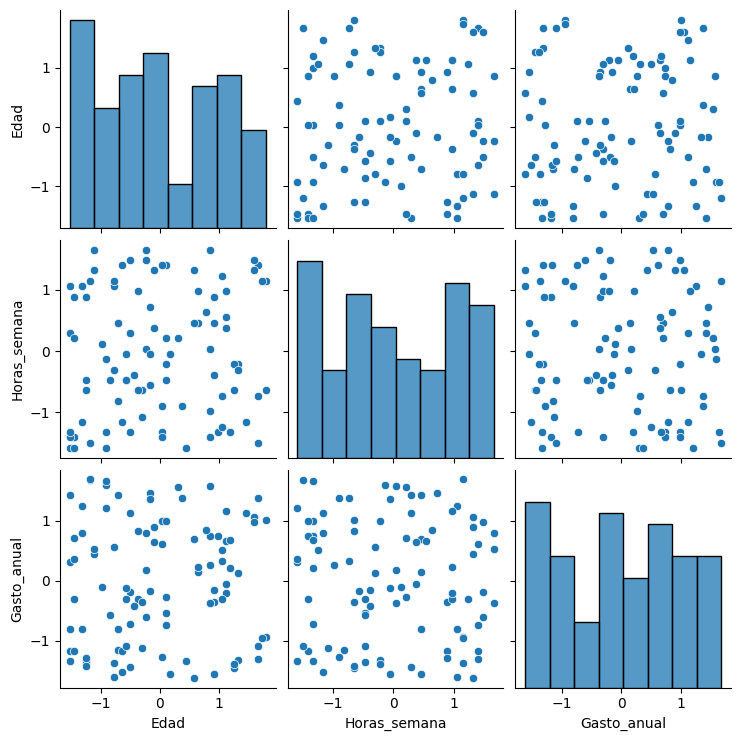

In [29]:
sns.pairplot(df_pStd)

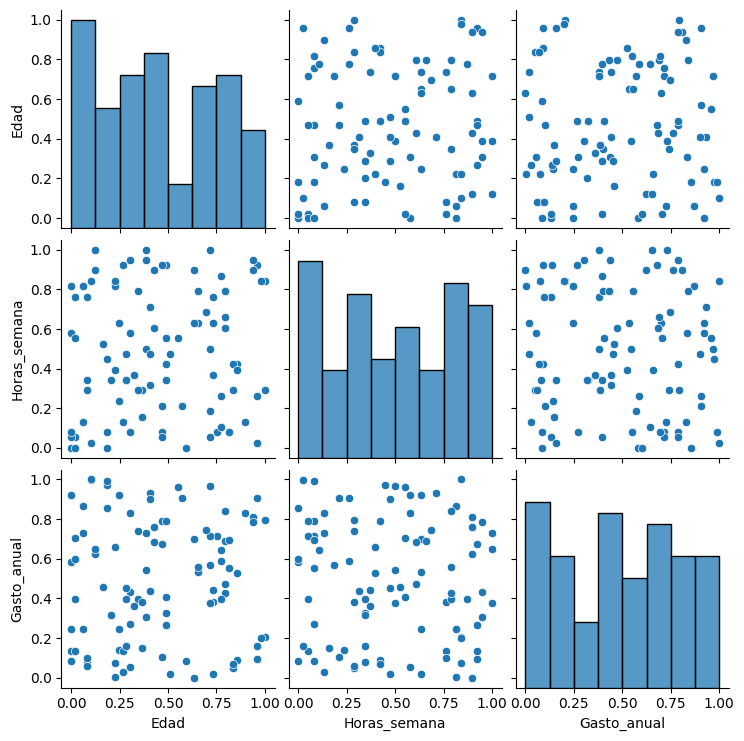

In [30]:
sns.pairplot(df_pMinMax)

## Transformación de variables categóricas

Como sabes, algunos algoritmos no comprenden las variables tipo texto, por ello, es necesario tranformarlas a un tipo numérico.

En este caso utilizarás un _dataset_ llamado `titanic`, que indica datos de los tripulantes del famoso barco. No necesitas descargar este conjunto de datos, pues viene por defecto en la librería de `seaborn` con el código `sns.load_dataset("titanic")`.

Observa este código ejecutado.

In [18]:
df=sns.load_dataset("titanic")
df.head() #Este código es para ver las primeras filas del dataset.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Si exploras el _dataset_, notarás que la variable (o columna) llamada `sex` contiene dos opciones: `male` o `female`. Ahora, `.value_counts() ` se utiliza para conocer los tipos de datos categóricos y cuántas veces se repiten en una variable o columna.

In [19]:
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

En el ejemplo de arriba se observa que, al usar`value_counts` en la columna `sex`de  `df`, existen dos valores: uno llamado `male`, que se repite 577 veces y `female`, que se repite 314 veces.

Otra forma de solicitar la misma información es mediante el siguiente código:
```python
df['sex'].value_counts()
```

Observa otro ejemplo. En la columna `embarked` hay tres valores posibles.

Así se escribiría el código:

In [20]:
df.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Una forma alternativa de escribir ese código es de la siguiente manera:
```python
df['embarked'].value_counts()
```

Un último ejemplo se observa con la variable `class`, que tiene tres posibles valores, apreciables con el código:

In [21]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

Si se gusta, puede usarse el siguiente código que dará el mismo resultado:
```python
df.class.value_counts()
```

Las variables categóricas se pueden detectar con la información del conjunto de datos, en este ejemplo, son `category` y `object`.

Recuerda que esto puede saberse la función `.info()`.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB



### Label Encoding


Con ayuda de este transformador, se asigna un número a la categória encontada; por ejemplo, la variable `class` abarca las categorías:

- `Third`
- `First`
- `Second`

Nota: se encuentran organizados por orden de aparición.

Al utilizar el escalador se obtienen las siguientes entradas:

- El valor `First` se renombra como `0`.
- El valor `Second` se llamará `1`.
- El valor `Third` se convierte en `2`.

Nota: Cuando se utiliza el **Label encoding**, los valores categóricos se ordenan alfabéticamente, de modo que al primer valor le llamará 0; al segundo, 1; al tercero, 2 y así sucesivamente.


Para utlizar esta herramienta es necesario importarla con el código `from sklearn.preprocessing import LabelEncoder` y ejecutarla como se muestra abajo.

In [23]:
from sklearn.preprocessing import LabelEncoder

Para facilitar el uso de esta herramineta se crea una variable. En el ejemplo se nombra como `transformador` y será igual a la función `LabelEncoder()`.

In [24]:
transformador = LabelEncoder()

Lo anterior permite aplicar la función `fit.transform()` de manera más sencilla. En este caso, dicha «transformación» se aplica solo en la columna `class`.

Observa en el código la solicitud del cambio únicamente para la columna `class`.

In [25]:
df['class'] = transformador.fit_transform(df['class'])

In [26]:
df['class']

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: class, Length: 891, dtype: int32

A continuación, se aplica `value_counts()` a la columna `class` para observar los valores que tiene y cuàntas veces se repite.

In [27]:
df['class'].value_counts()

class
2    491
0    216
1    184
Name: count, dtype: int64

Si se olvidaran los valores originales, se recurre a `.classes` en el transformador para señalizarlos.

In [28]:
transformador.classes_

array(['First', 'Second', 'Third'], dtype=object)

De igual manera, el primer valor mostrado es 0, el segundo será 1, el tercero 2 y así sucesivamente.

In [29]:
#OneHotEncoding
from sklearn.preprocessing import OneHotEncoder

Otra técnica es:

#OneHotEncoding

Algunos modelos pueden malinterpretar los valores cuando los datos se transforman con "Labelencoder"; por ejemplo, en el paso anterior existían 3 categorías, por tanto, la categoria asignada con el número 2 valía el doble que la categoría con el número 0.
¿La afirmación anterior es cierta? No, porque existe otra alternativa, como **OneHotEncoder**, que genera tantas columnas como posibles categorías se tengan de una variable y asigna valores binarios (0,1) para evitar este tipo de interpretación de algunos algoritmos. Finalmente, las variables creadas normalmente reciben el nombre de _«dummy»_.

In [30]:
transformador = OneHotEncoder()

In [31]:
enc_df = pd.DataFrame(transformador.fit_transform(df[['sex']]).toarray())
df = df.join(enc_df)

Si se tienen 2 variables binarias adicionales:


In [32]:
df[['sex',0,1]]

,sex,0,1
0,male,0.0,1.0
1,female,1.0,0.0
2,female,1.0,0.0
3,female,1.0,0.0
4,male,0.0,1.0
...,...,...,...
886,male,0.0,1.0
887,female,1.0,0.0
888,female,1.0,0.0
889,male,0.0,1.0


La librería pandas posee una función similar llamada "get_dummies". Su código es:

In [33]:
dummies = pd.get_dummies(df, columns=["sex"], prefix=["sex"] )
dummies[['sex_male','sex_female']]
#Obteniendo el mismo resultado que con la librería de Scitik learn

,sex_male,sex_female
0,True,False
1,False,True
2,False,True
3,False,True
4,True,False
...,...,...
886,True,False
887,False,True
888,False,True
889,True,False


Estas son las principales técnicas para el preprocesamiento de datos. Con estas se asegura que el modelo entenderá la información de la mejor forma, para obtener mejores resultados y evitar ruido dentro del modelo.

##### **Ponte a prueba 2**

Imagina que eres un analista de datos en una agencia de viajes. Tienes un conjunto de datos que contiene información sobre los destinos más populares, el tipo de alojamiento que eligen los viajeros y la temporada en la que viajan más a menudo. Quieres transformar estas variables categóricas para preparar los datos para un modelo de aprendizaje automático.

Puedes descargar el conjunto de datos del siguiente enlace: https://drive.google.com/file/d/1fDIlpQ-Q9qVN8bWGiPAregXysRtMMWVa/view?usp=sharing

**Descripción del conjunto de datos:**

**Destino:** Ciudad o país de destino.

**Tipo_alojamiento:** Tipo de alojamiento que el viajero prefiere (e.g., Hotel, Hostal, Airbnb).

**Temporada:** Temporada en la que el viajero suele viajar (e.g., Verano, Invierno, Primavera, Otoño).

Para lograr tu objetivo deberás realizar el siguiente análisis:

1. Carga y explora el conjunto de datos.
2. Utiliza LabelEncoder para transformar la variable Destino en numérica.
3. Utiliza OneHotEncoder para transformar las variables Tipo_alojamiento y Temporada en formatos numéricos.

## Reto de la semana

Descarga un estudio sobre algunos pingüinos en el siguiente enlace:

https://drive.google.com/file/d/1u-pbmc8bNjIRsgDwz3Bmr0DnbXRxHRiz/view?usp=sharing

1. Indica qué valores categóricos están en la columna `Island` e indica cuántas veces aparecen.
2. Escala los valores para las columnas `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)` y `Body Mass (g)`.

¡Feliz semana! Te espero en nuestra sesión. ✌
